## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ma/boston/2022-03-20/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* ...
* ... 
* ...

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,132,32,22,2022-01-30,0.27,1,48,3,NaN
1,5506,** Fort Hill Inn Private! Minutes to center!**,8229,Terry,NaN,Roxbury,42.32844,-71.09581,Entire home/apt,149,3,110,2021-10-25,0.70,10,12,3,Approved by the government
2,6695,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex",8229,Terry,NaN,Roxbury,42.32802,-71.09387,Entire home/apt,250,3,116,2021-10-12,0.75,10,105,1,STR446650
3,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,Beacon Hill,42.35867,-71.06307,Entire home/apt,110,91,25,2020-04-15,0.27,7,267,0,NaN
4,10730,Bright 1bed facing Golden Dome,26988,Anne,NaN,Downtown,42.35906,-71.06271,Entire home/apt,100,91,33,2021-12-16,0.22,7,223,1,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))


# verificar as 5 primeiras entradas do dataset
df.dtypes

Entradas:	 3462
Variáveis:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.440497
reviews_per_month                 0.268920
last_review                       0.268920
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

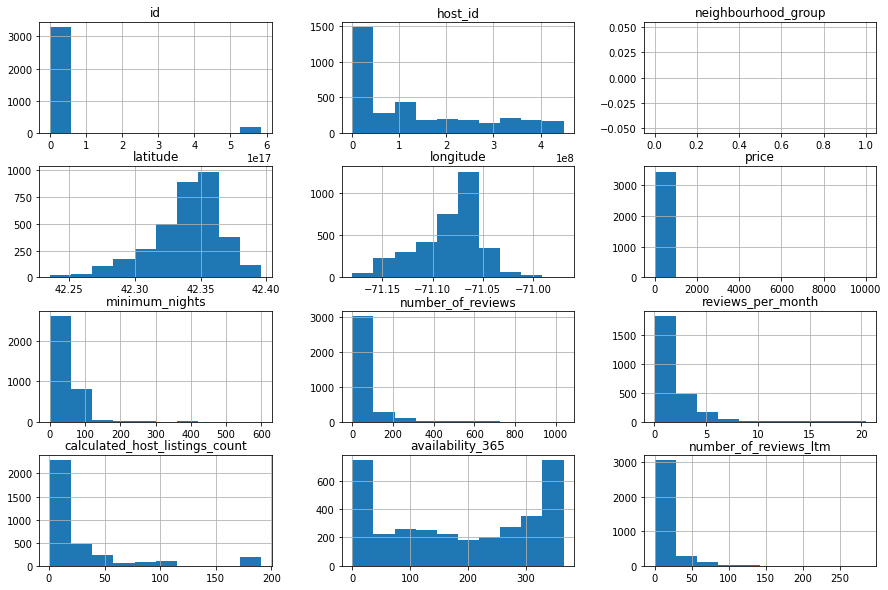

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(  figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
df["price"].mean()

197.00115540150202

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()


# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.025836,-0.020171,0.014716,0.030948,0.051359
minimum_nights,-0.025836,1.000000,-0.232770,-0.384832,0.076448,0.016479
number_of_reviews,-0.020171,-0.232770,1.000000,0.619412,-0.204146,-0.084118
reviews_per_month,0.014716,-0.384832,0.619412,1.000000,-0.053512,-0.000360
calculated_host_listings_count,0.030948,0.076448,-0.204146,-0.053512,1.000000,0.308762
availability_365,0.051359,0.016479,-0.084118,-0.000360,0.308762,1.000000


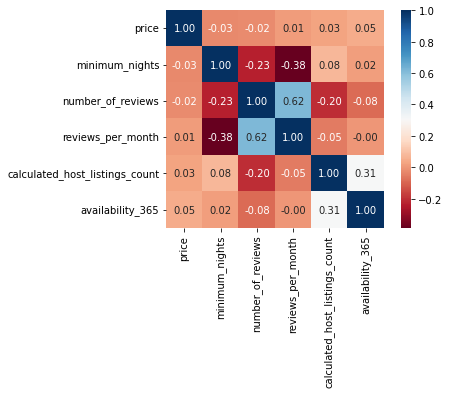

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='black', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    2317
Private room       1105
Hotel room           24
Shared room          16
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.669266
Private room       0.319180
Hotel room         0.006932
Shared room        0.004622
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Back Bay                   329.317597
Chinatown                  309.037736
North End                  271.204819
Downtown                   263.955272
South Boston Waterfront    247.729167
Fenway                     244.442177
West End                   221.619048
South End                  214.886926
South Boston               213.789116
Leather District           213.000000
Charlestown                200.814433
West Roxbury               192.857143
Mission Hill               190.203125
Beacon Hill                188.070866
Bay Village                182.081633
Jamaica Plain              180.937799
Dorchester                 179.459658
Longwood Medical Area      152.037037
East Boston                151.820276
Allston                    144.784404
Brighton                   143.105263
Mattapan                   135.842105
Roxbury                    118.729242
Roslindale                 106.000000
Harbor Islands              91.500000
Hyde Park                   90.11111

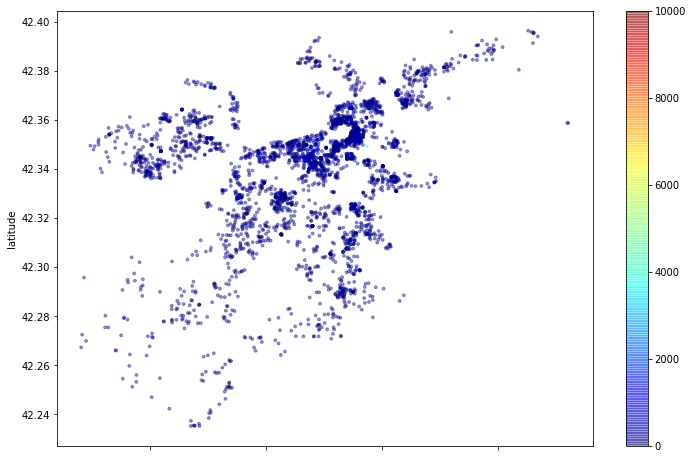

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df["minimum_nights"].mean()

34.22848064702484

## Conclusões
